In [52]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Perceptron
from tensorflow.keras import layers, models
from keras.preprocessing import image_dataset_from_directory


In [53]:
# TASK 3.1
# Load the dataset with resized images
testing = image_dataset_from_directory("Brain_tumor/Testing", label_mode='categorical', image_size=(28, 28))
training = image_dataset_from_directory("Brain_tumor/Training", label_mode='categorical', image_size=(28, 28))

Found 1311 files belonging to 4 classes.
Found 5712 files belonging to 4 classes.


In [54]:
# Apply memory optimization to training and validation datasets
training = training.cache().shuffle(5700).prefetch(tf.data.AUTOTUNE)
testing = testing.cache().shuffle(5700).prefetch(tf.data.AUTOTUNE)

# Define the number of classes in your dataset
num_classes = 4

In [55]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 3)),  # Input layer
    keras.layers.Rescaling(1./255),  # Normalizing layer
    keras.layers.Flatten(),  # Flatten layer
    keras.layers.Dense(100, activation='sigmoid'),  # First hidden layer with 100 neurons and sigmoid activation
    keras.layers.Dense(75, activation='sigmoid'),   # Second hidden layer with 75 neurons and sigmoid activation
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with num_classes neurons and softmax activation
])

In [56]:
# Compile the model
model.compile(optimizer='sgd',  # Use "sgd" as the optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [57]:
# Print model summary to get trainable parameters
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │       235,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │           304 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,179 (949.92 KB)

 Trainable params: 243,179 (949.92 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:

# Fit the model for 20 epochs
history = model.fit(
    training,
    validation_data=testing,
    epochs=20
)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6758 - loss: 0.8862 - val_accuracy: 0.6476 - val_loss: 0.9710
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6816 - loss: 0.8794 - val_accuracy: 0.6438 - val_loss: 0.9546
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6937 - loss: 0.8558 - val_accuracy: 0.6560 - val_loss: 0.9400
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7045 - loss: 0.8405 - val_accuracy: 0.6598 - val_loss: 0.9257
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7048 - loss: 0.8335 - val_accuracy: 0.6537 - val_loss: 0.9107
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7123 - loss: 0.8111 - val_accuracy: 0.6629 - val_loss: 0.8992
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7174 - loss: 0.7897 - val_accuracy: 0.6590 - val_loss: 0.8889
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7200 - loss: 0.7757 - val_accuracy: 0.

In [59]:
# Report the final training accuracy and validation accuracy
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Accuracy:", training_accuracy)
print("Final Validation Accuracy:", validation_accuracy)

Final Training Accuracy: 0.6677170991897583
Final Validation Accuracy: 0.6277650594711304


In [62]:
# TASK 3.2

# Define the model architecture for the 4-layer model
model_4_layers = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 3)),  # Input layer
    keras.layers.Rescaling(1./255),  # Normalizing layer
    keras.layers.Flatten(),  # Flatten layer
    keras.layers.Dense(100, activation='sigmoid'),  # First hidden layer with 100 neurons and sigmoid activation
    keras.layers.Dense(75, activation='sigmoid'),   # Second hidden layer with 75 neurons and sigmoid activation
    keras.layers.Dense(50, activation='sigmoid'),   # Third hidden layer with 50 neurons and sigmoid activation
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with num_classes neurons and softmax activation
])



In [63]:
# Compile the model
model.compile(optimizer='sgd',  # Use "sgd" as the optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to get trainable parameters
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │       235,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │           304 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,179 (949.92 KB)

 Trainable params: 243,179 (949.92 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Fit the model for 20 epochs
history = model.fit(
    training,
    validation_data=testing,
    epochs=20
)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7597 - loss: 0.6602 - val_accuracy: 0.6926 - val_loss: 0.7648
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7670 - loss: 0.6551 - val_accuracy: 0.7079 - val_loss: 0.7670
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7744 - loss: 0.6582 - val_accuracy: 0.7094 - val_loss: 0.7618
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7818 - loss: 0.6296 - val_accuracy: 0.7025 - val_loss: 0.7476
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7884 - loss: 0.6210 - val_accuracy: 0.7079 - val_loss: 0.7416
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7789 - loss: 0.6188 - val_accuracy: 0.7101 - val_loss: 0.7396
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7881 - loss: 0.6204 - val_accuracy: 0.7170 - val_loss: 0.7322
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7865 - loss: 0.6190 - val_accuracy: 0.

In [65]:
# Report the final training accuracy and validation accuracy for 4 layer model
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Accuracy:", training_accuracy)
print("Final Validation Accuracy:", validation_accuracy)

Final Training Accuracy: 0.806197464466095
Final Validation Accuracy: 0.7292143106460571


In [66]:
# Define the model architecture for the 5-layer model
model_5_layers = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 3)),  # Input layer
    keras.layers.Rescaling(1./255),  # Normalizing layer
    keras.layers.Flatten(),  # Flatten layer
    keras.layers.Dense(100, activation='sigmoid'),  # First hidden layer with 100 neurons and sigmoid activation
    keras.layers.Dense(75, activation='sigmoid'),   # Second hidden layer with 75 neurons and sigmoid activation
    keras.layers.Dense(50, activation='sigmoid'),   # Third hidden layer with 50 neurons and sigmoid activation
    keras.layers.Dense(50, activation='sigmoid'),   # Fourth hidden layer with 50 neurons and sigmoid activation
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with num_classes neurons and softmax activation
])


In [67]:
# Compile the model
model.compile(optimizer='sgd',  # Use "sgd" as the optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to get trainable parameters
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │       235,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │           304 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,179 (949.92 KB)

 Trainable params: 243,179 (949.92 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# Fit the model for 20 epochs
history = model.fit(
    training,
    validation_data=testing,
    epochs=20
)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8083 - loss: 0.5488 - val_accuracy: 0.7368 - val_loss: 0.6705
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8116 - loss: 0.5593 - val_accuracy: 0.7391 - val_loss: 0.6653
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8060 - loss: 0.5607 - val_accuracy: 0.7346 - val_loss: 0.6584
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8056 - loss: 0.5569 - val_accuracy: 0.7346 - val_loss: 0.6571
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8094 - loss: 0.5425 - val_accuracy: 0.7391 - val_loss: 0.6544
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8108 - loss: 0.5310 - val_accuracy: 0.7429 - val_loss: 0.6556
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8207 - loss: 0.5214 - val_accuracy: 0.7452 - val_loss: 0.6498
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8236 - loss: 0.5232 - val_accuracy: 0.

In [69]:
# Report the final training accuracy and validation accuracy for 5 layer model
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Accuracy:", training_accuracy)
print("Final Validation Accuracy:", validation_accuracy)

Final Training Accuracy: 0.8301820755004883
Final Validation Accuracy: 0.752860426902771


In [70]:
#TASK 3.3

# Model with 50% of neurons in each hidden layer
model_50_percent_neurons = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 3)),  
    keras.layers.Rescaling(1./255),  
    keras.layers.Flatten(),  
    keras.layers.Dense(50, activation='sigmoid'),  
    keras.layers.Dense(38, activation='sigmoid'),   
    keras.layers.Dense(num_classes, activation='softmax')  
])

# Model with 150% of neurons in each hidden layer
model_150_percent_neurons = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 3)),  
    keras.layers.Rescaling(1./255),  
    keras.layers.Flatten(),  
    keras.layers.Dense(150, activation='sigmoid'),  
    keras.layers.Dense(113, activation='sigmoid'),   
    keras.layers.Dense(num_classes, activation='softmax')  
])

# Compile the models (using the same optimizer, loss, and metrics as before)
model_50_percent_neurons.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_150_percent_neurons.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the models (using the same training and testing datasets)
history_50_percent_neurons = model_50_percent_neurons.fit(training, validation_data=testing, epochs=20)
history_150_percent_neurons = model_150_percent_neurons.fit(training, validation_data=testing, epochs=20)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.4851 - loss: 1.2233 - val_accuracy: 0.6377 - val_loss: 0.9292
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7106 - loss: 0.7734 - val_accuracy: 0.7063 - val_loss: 0.7340
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7784 - loss: 0.5955 - val_accuracy: 0.7178 - val_loss: 0.6774
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7968 - loss: 0.5426 - val_accuracy: 0.7651 - val_loss: 0.5836
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8263 - loss: 0.4717 - val_accuracy: 0.7773 - val_loss: 0.5538
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8500 - loss: 0.4308 - val_accuracy: 0.7834 - val_loss: 0.5298
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8620 - loss: 0.3870 - val_accuracy: 0.7902 - val_loss: 0.5118
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8793 - loss: 0.3498 - val_accuracy:

In [71]:
# Report the final training accuracy and validation accuracy for 50% neurons model
training_accuracy_50_percent = history_50_percent_neurons.history['accuracy'][-1]
validation_accuracy_50_percent = history_50_percent_neurons.history['val_accuracy'][-1]

print("Final Training Accuracy (50% Neurons):", training_accuracy_50_percent)
print("Final Validation Accuracy (50% Neurons):", validation_accuracy_50_percent)

# Report the final training accuracy and validation accuracy for 150% neurons model
training_accuracy_150_percent = history_150_percent_neurons.history['accuracy'][-1]
validation_accuracy_150_percent = history_150_percent_neurons.history['val_accuracy'][-1]

print("Final Training Accuracy (150% Neurons):", training_accuracy_150_percent)
print("Final Validation Accuracy (150% Neurons):", validation_accuracy_150_percent)

Final Training Accuracy (50% Neurons): 0.9621848464012146
Final Validation Accuracy (50% Neurons): 0.865751326084137
Final Training Accuracy (150% Neurons): 0.980042040348053
Final Validation Accuracy (150% Neurons): 0.9107551574707031


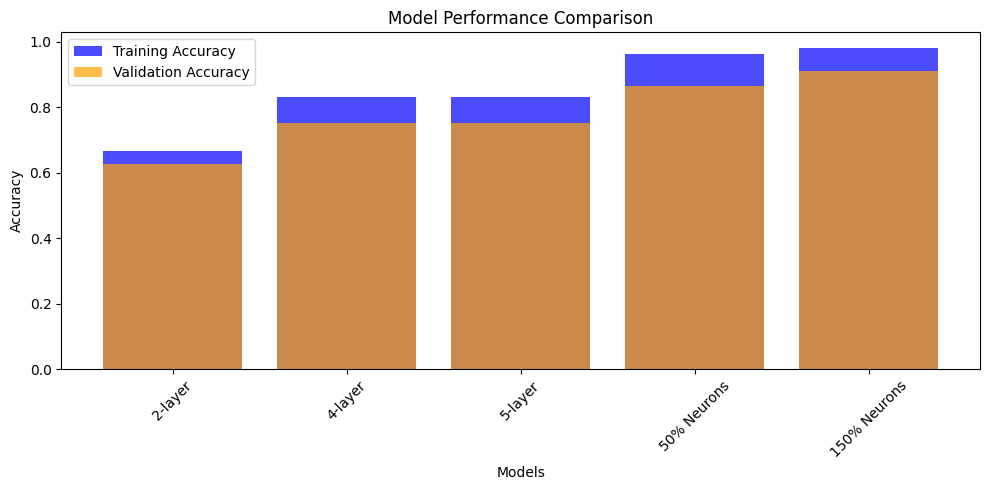

In [72]:
#TASK 3.4

# Define the models and their corresponding accuracies
models = ['2-layer', '4-layer', '5-layer', '50% Neurons', '150% Neurons']
training_accuracies = [0.6677, history.history['accuracy'][-1], history.history['accuracy'][-1], training_accuracy_50_percent, training_accuracy_150_percent]
validation_accuracies = [0.6278, history.history['val_accuracy'][-1], history.history['val_accuracy'][-1], validation_accuracy_50_percent, validation_accuracy_150_percent]

# Plotting
plt.figure(figsize=(10, 5))

plt.bar(models, training_accuracies, color='blue', alpha=0.7, label='Training Accuracy')
plt.bar(models, validation_accuracies, color='orange', alpha=0.7, label='Validation Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

In [73]:
# TASK 3.6
# Define the model architecture with dropout layer
model_with_dropout = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 3)),  # Input layer
    keras.layers.Rescaling(1./255),  # Normalizing layer
    keras.layers.Flatten(),  # Flatten layer
    keras.layers.Dense(100, activation='sigmoid'),  # First hidden layer with 100 neurons and sigmoid activation
    keras.layers.Dropout(0.25, seed=42),  # Dropout layer with 25% fraction of deactivated neurons
    keras.layers.Dense(75, activation='sigmoid'),   # Second hidden layer with 75 neurons and sigmoid activation
    keras.layers.Dropout(0.25, seed=42),  # Dropout layer with 25% fraction of deactivated neurons
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with num_classes neurons and softmax activation
])

# Compile the model
model_with_dropout.compile(optimizer='sgd',  # Use "sgd" as the optimizer
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Fit the model for 20 epochs
history_with_dropout = model_with_dropout.fit(
    training,
    validation_data=testing,
    epochs=20
)

# Report the final training accuracy and validation accuracy
training_accuracy_with_dropout = history_with_dropout.history['accuracy'][-1]
validation_accuracy_with_dropout = history_with_dropout.history['val_accuracy'][-1]

print("Final Training Accuracy (with dropout):", training_accuracy_with_dropout)
print("Final Validation Accuracy (with dropout):", validation_accuracy_with_dropout)

# Calculate the difference between training and validation accuracy
difference_with_dropout = training_accuracy_with_dropout - validation_accuracy_with_dropout
print("Difference between Training and Validation Accuracy (with dropout):", difference_with_dropout)


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2651 - loss: 1.4594 - val_accuracy: 0.3089 - val_loss: 1.3595
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2855 - loss: 1.4086 - val_accuracy: 0.3082 - val_loss: 1.3433
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3182 - loss: 1.3762 - val_accuracy: 0.3158 - val_loss: 1.3315
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3013 - loss: 1.3872 - val_accuracy: 0.5004 - val_loss: 1.3225
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3179 - loss: 1.3681 - val_accuracy: 0.5469 - val_loss: 1.3114
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3400 - loss: 1.3459 - val_accuracy: 0.5034 - val_loss: 1.2991
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3537 - loss: 1.3336 - val_accuracy: 0.5591 - val_loss: 1.2884
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3718 - loss: 1.3294 - val_accuracy: 0

In [74]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_with_dropout.evaluate(testing)

# Report the deployment loss and accuracy
print("Deployment Loss:", test_loss)
print("Deployment Accuracy:", test_accuracy)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6091 - loss: 1.0790
Deployment Loss: 1.0781766176223755
Deployment Accuracy: 0.6109839677810669
